### Regresion con Arboles de Decisión

Es un modelo de probabilidad.

* Parametros:


    - criterion: -squared_error (cuadrado de la media de errores) Valor por defecto
                -friedman_mse: ¡?
                -absolute_error (error absoluto)
                -poisson: ¿?
    - random_state: semilla 
    - splitter: best/random. Por defecto Best
    - max_depth: profundidad (para no sobreparametrizar si hay muchas variables se puede poner 5 o 6)
    - min_samples_split:minimo numero de muestras para crear cada una de las ramas. Por defecto 2. Puede ser 10 o 15.
    - min_weight_fraction_leaf: minimo peso para constriur las ramas.
    - max_features: maximo de caracteristicas si tenemos muchas variables. Ej 13 o 15
    - max_leaf_nodes: maximo numero de nodos. Determinara tambien la profundidad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\regresion_arboles.csv')

In [5]:
df.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [8]:
df.shape

(10, 3)

Es el df pequeñito. No separo testing/training. Paso directamente a division de variables y al modelo.

#### Separar variables dependiente/independiente

In [9]:
x=df.iloc[:,[1]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y=df.iloc[:,[2]].values  # x es el nivel, y es el salario

#### Dummys y Missing no hay

In [12]:
df.isnull().value_counts()

Position  Level  Salary
False     False  False     10
dtype: int64

In [15]:
df.head(2) 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [23]:
# Level es la categorizacion de Position y salary es la variable a predecir y es cuantitativa. 
# Por tanto podemos prescindir de Position

df.groupby(['Level','Position']).count().sort_values(by="Level",  ascending=False)

,,Salary
Level,Position,
10,CEO,1
9,C-level,1
8,Senior Partner,1
7,Partner,1
6,Region Manager,1
5,Country Manager,1
4,Manager,1
3,Senior Consultant,1
2,Junior Consultant,1


#### Dividir Training/test no porque son muy pocos datos

#### Normalizacion/estandarizacion en este modelo SI que hay que hacerlo.

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [27]:
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

#### Seleccion de variables tampoco aplica porque solo trabajaremos en este caso con una

#### Crear modelo

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
reg_arbol=DecisionTreeRegressor(criterion='squared_error', random_state=1987)
reg_arbol.fit(x,y)

DecisionTreeRegressor(random_state=1987)

#### Prediccion para 6,5

In [36]:
y_arbol=reg_arbol.predict(sc_x.fit_transform([[6.5]]))
sc_y.inverse_transform([[y_arbol[0]]])

array([[110000.]])

#### Evaluacion del modelo (r2, mae,mse)

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
r2_arbol=r2_score(y, reg_arbol.predict(x) ) 
mae_arbol=mean_absolute_error(y, reg_arbol.predict(x))
mse_arbol=mean_squared_error(y, reg_arbol.predict(x))
print(f'Estadisticos de la regresion por Arbol de Desicion\n r2: {r2_arbol:.2f} \n mae: {mae_arbol:.2f} \n mse: {mse_arbol:.2f}')


Estadisticos de la regresion por Arbol de Desicion
 r2: 1.00 
 mae: 0.00 
 mse: 0.00


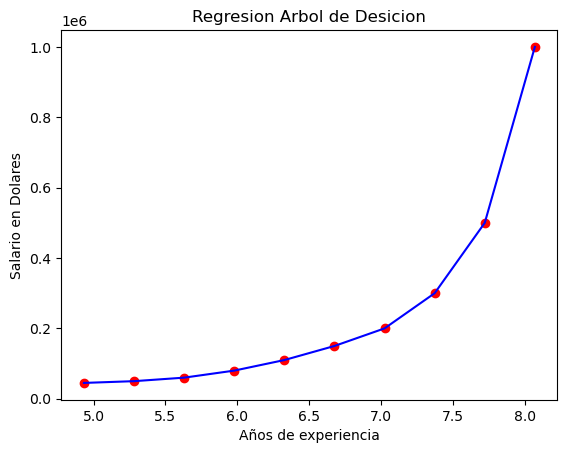

In [40]:
plt.title('Regresion Arbol de Desicion')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg_arbol.predict(x).reshape(-1, 1)), color='blue')
plt.show()

Se ve que esta demasiado ajustado. 

Esto es porque la grafica no esta del todo bien dibujada. Los arboles se ven escalonados.

Una rama del arbol es lo que deberiamos ver.

La probabilidad del arbol es discreta, no continua como se ve.

##### Modificacion de la grafica para verla de manera mas correcta

In [50]:
x_grid=np.arange(min(x),max(x), 0.1) # creamos unos valores de x para escalonar
x_grid

array([-1.5666989, -1.4666989, -1.3666989, -1.2666989, -1.1666989,
       -1.0666989, -0.9666989, -0.8666989, -0.7666989, -0.6666989,
       -0.5666989, -0.4666989, -0.3666989, -0.2666989, -0.1666989,
       -0.0666989,  0.0333011,  0.1333011,  0.2333011,  0.3333011,
        0.4333011,  0.5333011,  0.6333011,  0.7333011,  0.8333011,
        0.9333011,  1.0333011,  1.1333011,  1.2333011,  1.3333011,
        1.4333011,  1.5333011])

In [52]:
# x_grid.reshape(len(x_grid),1)

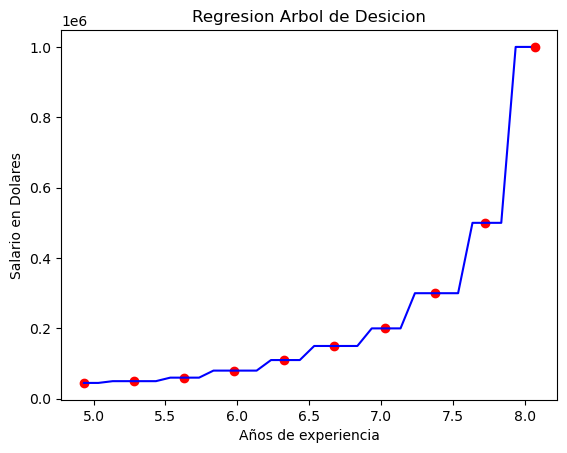

In [53]:
plt.title('Regresion Arbol de Desicion')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')

x_grid=np.arange(min(x),max(x), 0.1)
x_grid=x_grid.reshape(len(x_grid),1)

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x_grid), sc_y.inverse_transform(reg_arbol.predict(x_grid).reshape(-1, 1)), color='blue')
plt.show()

Este arbol esta sobreajustado. Lo que podemos hacer es pasar a un algoritmo de muchos arboles como el Random Forest.